In [1]:
import mplsoccer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text
from highlight_text import fig_text

background = '#1E1E21'
text_col = 'white'
mpl.rcParams['font.family']= 'Calibri'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['text.color'] = text_col
mpl.rcParams['xtick.color'] = text_col
mpl.rcParams['ytick.color'] = text_col
mpl.rcParams['legend.title_fontsize'] = 20
mpl.rcParams['legend.fontsize'] = 17

In [2]:
df = pd.read_csv('../passing.csv', index_col='Rk')
df_pos = pd.read_excel('../Player Positions-FBRef format.xlsx')

In [3]:
df = pd.merge(df, df_pos, on='Player')
df = df.drop_duplicates()

In [4]:
min_90s = 20

df_fil = df[(df['90s']>=min_90s) & (df['Position'].apply(lambda x: 'Midfield' in x))]

In [5]:
index = (df_fil['Cmp']/df_fil['90s']).sort_values(ascending=False)[:10].index

In [6]:
for i in index:
    print (df.loc[i]['Player'])

Sergio Busquets
Toni Kroos
Steven Nzonzi
Rodri
Mateo Kovačić
Ander Herrera
Maxime Lopez
Manuel Locatelli
Frenkie de Jong
Joshua Kimmich


In [7]:
shortpass_col = '#FF0000'
medpass_col = '#1AFF00'
longpass_col = '#00CEFF'
player_col = '#ad993c'

def passmap(idx, ax):
    # FILTERING DF
    df_fil = df.loc[idx]
    
    ax.text(28,90,'Per 90'.upper(), style='italic')
    ax.text(54,90,'Completion %'.upper(), style='italic')
    pitch = mplsoccer.Pitch(pitch_type='opta',pitch_color='#221F1C',
                            linewidth=1, line_alpha=0.7)
    pitch.draw(ax=ax)
    #SHORT PASSES
    pitch.lines(45,75,55,75,lw=3, transparent=True, comet=True,
                  color=shortpass_col, ax=ax)
    ax.text(33,73,str(round(df_fil['Cmp.1']/df_fil['90s'],2)), weight='bold', 
            c=shortpass_col)
    ax.text(57,73,str(df_fil['Cmp%.1'])+' %', weight='bold', 
            c=shortpass_col)
    # MEDIUM PASSES
    pitch.lines(37,50,62,50,lw=3, transparent=True, comet=True,
                  color=medpass_col, ax=ax)
    ax.text(25.5,48,str(round(df_fil['Cmp.2']/df_fil['90s'],2)), weight='bold', 
            c=medpass_col)
    ax.text(64,48,str(df_fil['Cmp%.2'])+' %', weight='bold', 
            c=medpass_col)
    # LONG PASSES
    pitch.lines(27,25,67,25,lw=3, transparent=True, comet=True,
                  color=longpass_col, ax=ax)
    ax.text(18,23,str(round(df_fil['Cmp.3']/df_fil['90s'],2)), weight='bold', 
            c=longpass_col)
    ax.text(69,23,str(df_fil['Cmp%.3'])+' %', weight='bold', 
            c=longpass_col)
    
    # PLAYER LABEL
    ax.text(2,5,df_fil['Player'].upper(), c=player_col, weight='heavy', family='Century Gothic')
    ax.text(52,5,str(round(df_fil['Cmp']/df_fil['90s'],1))+' Comp. Passes p90', c=player_col, weight='heavy')

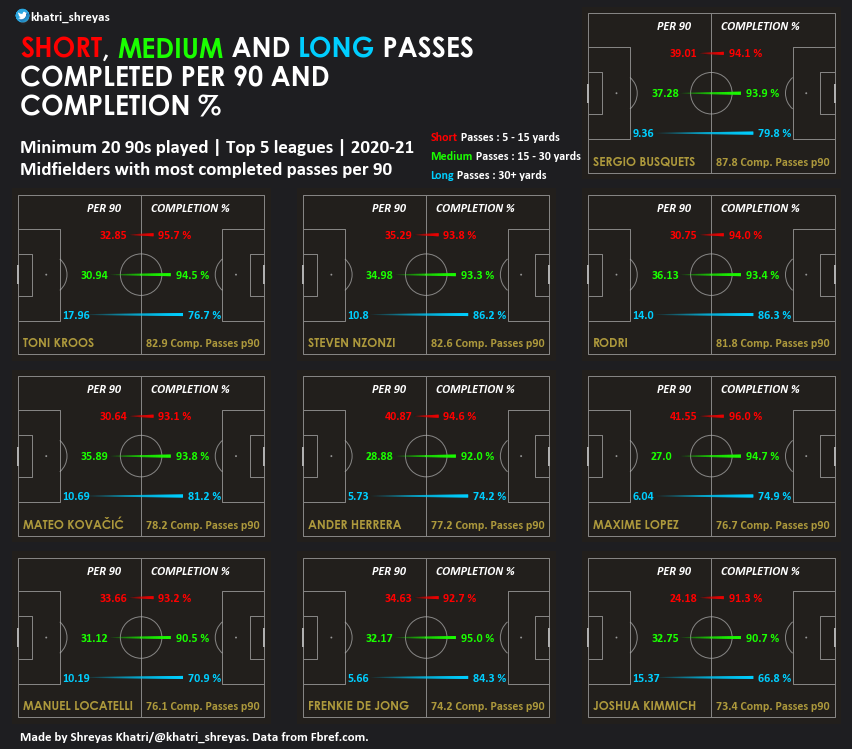

In [8]:
fig, ax = plt.subplots(figsize=(12,10.5))
fig.set_facecolor(background)
ax.axis('off')

ax = fig.add_axes([0.68,0.76,0.3,0.23])
passmap(index[0],ax)

ax = fig.add_axes([0.02,0.52,0.3,0.23])
passmap(index[1],ax)

ax = fig.add_axes([0.35,0.52,0.3,0.23])
passmap(index[2],ax)

ax = fig.add_axes([0.68,0.52,0.3,0.23])
passmap(index[3],ax)

ax = fig.add_axes([0.02,0.28,0.3,0.23])
passmap(index[4],ax)

ax = fig.add_axes([0.35,0.28,0.3,0.23])
passmap(index[5],ax)

ax = fig.add_axes([0.68,0.28,0.3,0.23])
passmap(index[6],ax)

ax = fig.add_axes([0.02,0.04,0.3,0.23])
passmap(index[7],ax)

ax = fig.add_axes([0.35,0.04,0.3,0.23])
passmap(index[8],ax)

ax = fig.add_axes([0.68,0.04,0.3,0.23])
passmap(index[9],ax)

#LABELS AND TITLES
fig_text(0.03,0.95,'<SHORT>, <MEDIUM> AND <LONG> PASSES\nCOMPLETED '+
        'PER 90 AND\nCOMPLETION %', size=27, family='Century Gothic',
         highlight_textprops=[{'color':shortpass_col},{'color':medpass_col},{'color':longpass_col}])
fig_text(0.03,0.815,'Minimum 20 90s played | Top 5 leagues | 2020-21', size=19)
fig_text(0.03,0.785,'Midfielders with most completed passes per 90', size=19)
fig.text(0.03,0.02,'Made by Shreyas Khatri/@khatri_shreyas. Data from Fbref.com.', size=13, weight='heavy')

fig_text(0.505,0.825,'<Short> Passes : 5 - 15 yards',  highlight_textprops=[{'color':shortpass_col}])
fig_text(0.505,0.8,'<Medium> Passes : 15 - 30 yards',  highlight_textprops=[{'color':medpass_col}])
fig_text(0.505,0.775,'<Long> Passes : 30+ yards',  highlight_textprops=[{'color':longpass_col}])

# TWITTER
ax2 = fig.add_axes([0.02,0.965,0.025,0.025])
ax2.axis('off')
img = plt.imread('twitter.png')
ax2.imshow(img)
fig.text(0.042,0.9725,'khatri_shreyas', size=13, weight='bold')

plt.tight_layout()

#plt.savefig('Images/Pass%', facecolor=background, dpi=300)

In [9]:
# INDIVIDUAL TEAM
team = 'Manchester Utd'

df_fil = df[(df['90s']>=10) & (df['Position'].apply(lambda x: 'Midfield' in x)) & (df['Squad']==team)]
index = (df_fil['Cmp']/df_fil['90s']).sort_values(ascending=False)[:10].index

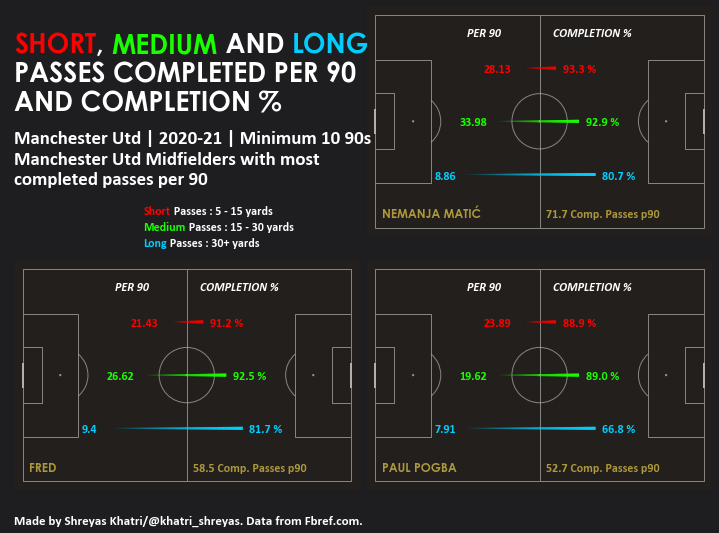

In [10]:
fig, ax = plt.subplots(figsize=(10,7.5))
fig.set_facecolor(background)
ax.axis('off')

ax = fig.add_axes([0.51,0.55,0.48,0.43])
passmap(index[0],ax)

ax = fig.add_axes([0.02,0.08,0.48,0.43])
passmap(index[1],ax)

ax = fig.add_axes([0.51,0.08,0.48,0.43])
passmap(index[2],ax)

plt.tight_layout()

#LABELS AND TITLES
fig_text(0.02,0.93,'<SHORT>, <MEDIUM> AND <LONG>\nPASSES COMPLETED '+
        'PER 90\nAND COMPLETION %', size=27, family='Century Gothic',
         highlight_textprops=[{'color':shortpass_col},{'color':medpass_col},{'color':longpass_col}])
fig_text(0.02,0.75,team+' | 2020-21 | Minimum 10 90s', size=19)
fig_text(0.02,0.71,team+' Midfielders with most\ncompleted passes per 90', size=19)
fig.text(0.02,0.02,'Made by Shreyas Khatri/@khatri_shreyas. Data from Fbref.com.', size=13, weight='heavy')


fig_text(0.2,0.61,'<Short> Passes : 5 - 15 yards',  highlight_textprops=[{'color':shortpass_col}])
fig_text(0.2,0.58,'<Medium> Passes : 15 - 30 yards',  highlight_textprops=[{'color':medpass_col}])
fig_text(0.2,0.55,'<Long> Passes : 30+ yards',  highlight_textprops=[{'color':longpass_col}])

#plt.savefig('Images/'+team+' Passing', facecolor=background, dpi=300)